# Tarea 4

Miguel Raz [@miguelraz](https://github.com/miguelraz)

Claudio Pierard [@cpierard](https://github.com/cpierard)

**Envío del PR inicial:** lunes 26 de septiembre

**Aceptación del PR:** lunes 10 de octubre

**Ejercicio 0:** Velocidad de convergencia

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

  Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?

  En los dos últimos incisos, el interés es en los ciclos de periodo 2.

In [1]:
using Plots, LaTeXStrings, DualNumbers
pyplot()

Plots.PyPlotBackend()

**Ejercicio 1:**

Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc. 

A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde

\begin{equation}
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
\end{equation}

La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.



*Hint:* Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$. 

Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

In [112]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
    x0 = 0.5
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    return nothing
end

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c)
        ff[:,ic] = xx
    end
    
    return ff
end

diagbifurc (generic function with 1 method)

In [2]:
function bifurcation_function(f, x0, n, range_r, k)
    
    orbit = Float64[]
    r_par = Float64[]
    
    for r in range_r
        
        solution = []
        #steps = Int[0]
        x_old = x0
        
        for j in 1:n
            
            x_new = f(x_old, r)
            x_old = x_new
            
        end
        
        for i in 1:k

            x_new = f(x_old, r)
            push!(solution, x_new)
            #push!(steps, i)
            x_old = x_new

        end
            
        #deleteat!(solution, 1:k) #Remove the transient.
        rs = similar(solution)
        
        for i in 1:length(solution)
            
            rs[i] = r
            
        end
        
        append!(orbit, solution)
        append!(r_par, rs)
        
    end
    
    return r_par, orbit
    
end

bifurcation_function (generic function with 1 method)

[Plots.jl] Initializing backend: pyplot



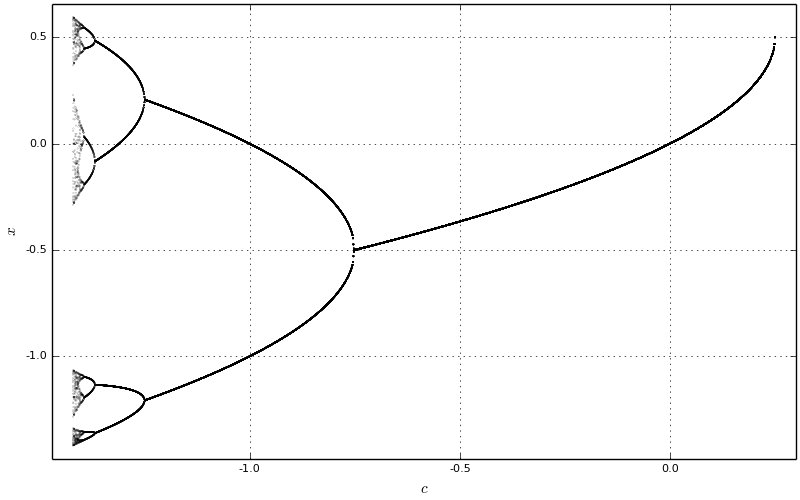

In [3]:
f(x,c) = x^2 + c
c_parametro, orbita = bifurcation_function(f, 0.5, 1000, -1.42:1e-3:.25, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

In [18]:
"""
    iterator(f::Function, n::Int, k, x0, c)
"""

function iterator(f::Function, n::Int, k, x0, c)

    solution = Float64[]
    #steps = Int[0]
    x_old = x0
    for i in 1:n

        x_new = f(x_old, c)
        x_old = x_new

    end
    for i in 1:k
        
        x_new = f(x_old, c)
        push!(solution, x_old)
        x_old = x_new

    end
    
    return solution

end

iterator (generic function with 1 method)

In [5]:
function itera_funcion_anonym(n)
    
    x = "x^2 + c"

    for i in 1:n-1

        x = "($x)^2 +c"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
end 

itera_funcion_anonym (generic function with 1 method)

In [6]:
"""
    compute_roots_paso(f::Function, x0, c)
"""
function compute_roots_paso(f::Function, x0, c)
            
            xi = Dual(x0, 1)

            # 1000 iterations of Newton's method
    for i in 1:1000

        x_2 = realpart(xi) - (realpart(f(xi, c)) - realpart(xi)) / (dualpart(f(xi, c)) - 1)
        xi = Dual(x_2, 1)
    end

    realpart(xi)
end

compute_roots_paso (generic function with 1 method)

In [7]:
function find_bifurcation(FF, CC)
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        #Q_n = eval(itera_funcion(n))
        
        #x_i = compute_roots_paso(itera_funcion_anonym(2^n), FF[i], CC[i])
        x_i = FF[i]
        x_e = itera_funcion_anonym(2^n)(x_i, CC[i])
            
        if abs(x_i - x_e) > 1e-7
            
            n += 1
            push!(bifurcaciones, [CC[i], 2^n])
            
        end
        
    end
    
    bifurcaciones
    
end  

find_bifurcation (generic function with 1 method)

In [11]:
crange = -0.73:-1/2^15:-1.4012

ff = diagbifurc(itera_funcion_anonym(1), 50000, 1, crange); 
cc = ones(size(ff)[1])*crange';

In [12]:
a = find_bifurcation(ff, cc)

9-element Array{Any,1}:
 [-0.749775390625,2.0]     
 [-1.2498974609375,4.0]    
 [-1.3680615234375,8.0]    
 [-1.394031982421875,16.0] 
 [-1.399647216796875,32.0] 
 [-1.40083740234375,64.0]  
 [-1.401112060546875,128.0]
 [-1.401142578125,256.0]   
 [-1.401173095703125,512.0]

In [13]:
function feigenbaum_const(A)
    ratio = Float64[]
    
    for i in 3:length(A)
        
        r = (a[i-1][1] - a[i-2][1])/(a[i][1] - a[i-1][1])
        push!(ratio, r)
        
    end
    
    ratio
    
end 

feigenbaum_const (generic function with 1 method)

In [14]:
feigenbaum_const(a)

7-element Array{Float64,1}:
 4.23244
 4.54994
 4.625  
 4.71795
 4.33333
 9.0    
 1.0    

**Ejercicio 2:**

Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

In [15]:
S_c(x,c) = c*sin(x)

S_c (generic function with 1 method)


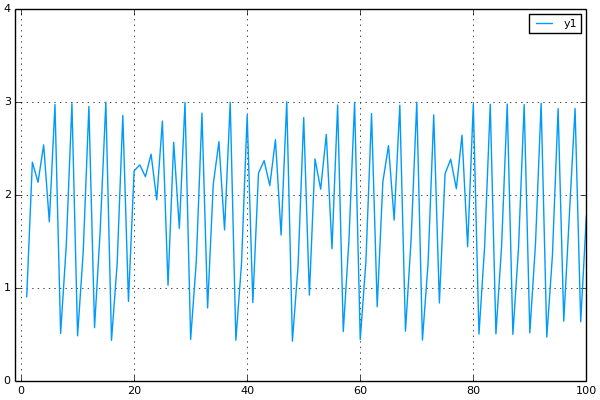

In [71]:
orbit = iterator(S_c, 0, 100, 0.9, 3);
plot(1:100, orbit, ylim=(0, 4), xlim=(-1, 100))


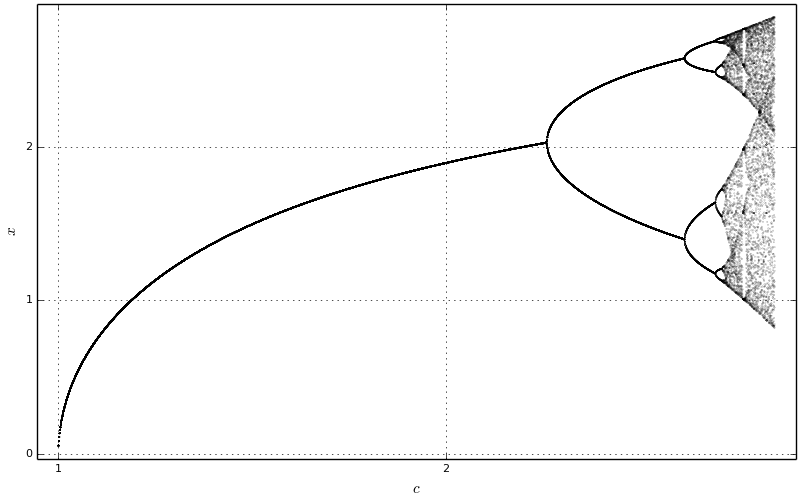

In [95]:
c_parametro, orbita = bifurcation_function(S_c, 0.5, 1000, 1:1e-3:2.85, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))


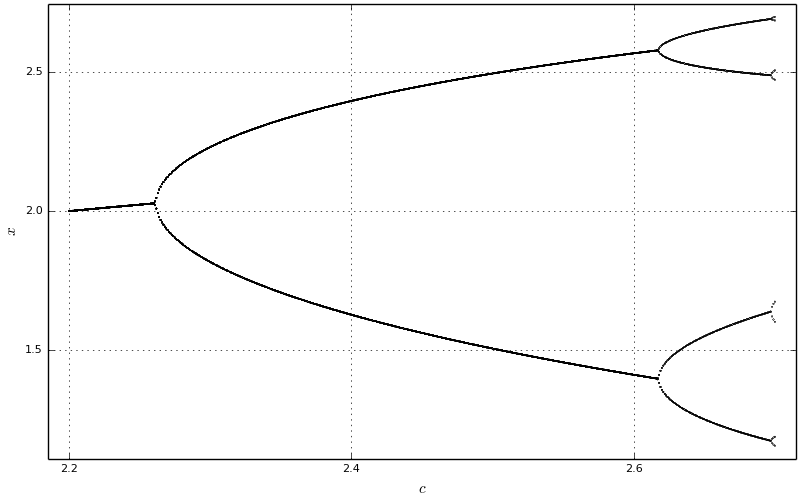

In [123]:
c_parametro, orbita = bifurcation_function(S_c, 0.5, 1000, 2.2:1e-3:2.70, 50)
scatter(c_parametro,orbita, markersize=0.1, c=:black, leg=false, grid=true, xaxis=(L"c"), yaxis=(L"x"), size=(800,500))

In [80]:
function itera_funcion_sine(n)
    
    x = "c*sin(x)"

    for i in 1:n-1

        x = "c*sin($x)"

    end

    ex = parse(x)
    ex_ret = :( (x, c) -> $ex )
    eval(ex_ret)
    #ex_ret
end 

itera_funcion_sine (generic function with 1 method)

In [228]:
itera_funcion_sine(2^11)(2.2, 1)

0.038205184428837524

In [229]:
2^11

2048

In [219]:
function find_bifurcation_sine(FF, CC)
    
    bifurcaciones = Any[]
    #eval(itera_funcion(1))
    n = 0
    
    for i in 1:length(FF)
        
        x_i = FF[i]
        x_e = itera_funcion_sine(2^n)(x_i, CC[i])
            
        if abs(x_i - x_e) > 1e-5
            
            n += 1
            push!(bifurcaciones, [CC[i], 2^n])
            
        end
        
    end
    
    bifurcaciones
    
end  

find_bifurcation_sine (generic function with 1 method)

In [212]:
orbit_sine = diagbifurc(S_c, 50000, 1, 2.2:0.001:2.4); 
c_sine = ones(size(orbit_sine)[1])*crange';

In [213]:
orbit_sine

1x201 Array{Float64,2}:
 2.00024  2.00071  2.00119  2.00166  …  1.63237  1.63093  1.62949  1.62806

In [220]:
find_bifurcation_sine(orbit_sine, c_sine)

LoadError: LoadError: syntax: expression too large
while loading In[220], in expression starting on line 1

## c = 2.2, n = 2

In [171]:
x_1 = iterator(S_c, 50000, 1, 0.5, 2.2)

1-element Array{Float64,1}:
 2.00024

In [172]:
x_1_p = itera_funcion_sine(2^0)(x_1, 2.2)

1-element Array{Float64,1}:
 2.00024

In [199]:
function prueba_entrada(f, x0, c, n)
    
    x_e = iterator(f, 50000, 1, x0, c)
    x_e_p = itera_funcion_sine(2^n)(x_e, c)
    delta = abs(x_e - x_e_p)
    println("x_e = $x_e")
    println("x_e_p = $x_e_p")
    println("d = $delta")
end

prueba_entrada (generic function with 1 method)

In [200]:
prueba_entrada(S_c, 0.5, 2.2, 0)

x_e = [2.00023715859949]
x_e_p = [2.0002371585994947]
d = [4.884981308350689e-15]


In [231]:
prueba_entrada(S_c, 0.5, 2.261, 1)

x_e = [2.0283871081885803]
x_e_p = [2.0283871081885803]
d = [0.0]


In [218]:
prueba_entrada(S_c, 0.5, 2.3, 0)

x_e = [2.23010730538739]
x_e_p = [1.8179533375240076]
d = [0.4121539678633823]


In [203]:
prueba_entrada(S_c, 0.5, 2.61, 1)

x_e = [2.573696686757929]
x_e_p = [2.5736966867579247]
d = [4.440892098500626e-15]


In [209]:
prueba_entrada(S_c, 0.5, 2.618, 2)

x_e = [2.5840989538987147]
x_e_p = [2.5840989538987147]
d = [0.0]


In [210]:
prueba_entrada(S_c, 0.5, 2.62, 2)

x_e = [2.596580438820513]
x_e_p = [2.596580438820513]
d = [0.0]


**Ejercicio 3:**

Como se ve en la Fig. 1 (de [este](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/08_Mapeos1d-3.ipynb) notebook), $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.